<h1><center> TP gradient stochastique </center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exemple sur données synthétiques

On pourra utiliser la fonction stochastic_gradient fournie dans SGD_classification.py.

1. On considère ici la perte quadratique : l(a, b) = (a − b)^2/2. Calculer ∂l/∂x (a, b)

l(a,b) = 1/2(a^2 - 2ab + b^2)

∂l/∂x(a, b) = a - b

2. Implémenter l'algorithme SGD avec le choix d'un pas constant γ et d'un nombre d'itérations T permettant de minimiser le critère et d'aboutir à une solution correcte.

In [183]:
def gamma(t):
    return 1. / (100 + t)

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.005  # suggested step size
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

X_toy = np.random.randn(n_samples, n_features)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target)

In [184]:
############################################################################
#                Stochastic gradient
############################################################################

def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])); # QUESTION 2
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            raise NotImplementedError('QUESTION 6')
        
        all_w[t] = w
    return w, all_w, pobj

In [23]:
stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini, loss="mse", alpha=0, average=False)

(array([-0.0919492 ,  0.980013  ,  0.91719107,  1.02404496,  1.0679922 ,
         0.91312513,  1.01269072,  1.01979645,  0.94884424,  1.01788183,
         0.97568721,  1.00861519,  0.9634559 ,  0.96416923,  0.9806359 ,
         0.93650907,  1.00042139,  1.01818945,  0.97179079,  0.87774329,
         1.08722782,  0.94067239,  0.93080326,  0.96106972,  0.89856946,
         0.97567257,  0.95675197,  1.02853975,  1.00187749,  0.96960231,
         0.98653455,  1.00232039,  0.98492401,  0.97012547,  0.90504981,
         0.97091901,  0.95563572,  0.980064  ,  1.06600322,  1.00723081,
         0.91812426,  1.07012131,  0.96469093,  0.90796727,  0.9382238 ,
         0.96067054,  1.00307856,  0.9468966 ,  0.9996534 ,  1.00099028,
         0.93407717,  1.04039033,  0.89386376,  0.97090664,  0.9886277 ,
         0.93817748,  1.0882965 ,  1.07014167,  1.01590051,  0.93087764,
         0.99232452,  1.0224454 ,  0.93877605,  0.97874281,  1.04388497,
         1.02818984,  0.99332919,  1.00329609,  1.0

3. Prendre comme modèle jouet : n vecteurs de Rp tiré de manière i.i.d selon une loi gaussienne, centrée
réduite (prendre n = 1000,p = 100). On note w⋆ = (1,...,1)⊤, et l'on définit ∀i ∈ {1,...,n},yi =
x⊤w⋆. Donner le minimiseur de 1/n ∑ l(fwˆ(xi),yi).

In [24]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,loss=loss, alpha=0, average=False)
w_toy

array([-0.02001347,  0.96479349,  0.92616907,  0.99467034,  0.97835342,
        0.93490756,  0.944296  ,  0.97080127,  0.9863681 ,  1.01631155,
        1.00195639,  0.96688895,  0.98719706,  0.9500306 ,  0.91734588,
        0.94642677,  1.0236102 ,  1.02953873,  1.01511533,  0.95986762,
        0.99535147,  0.93337209,  1.0369701 ,  0.94857016,  0.94004399,
        0.92263991,  0.99813851,  1.01658783,  1.01332928,  0.91137137,
        1.03808274,  1.06041703,  0.97002197,  1.00352658,  0.95524629,
        0.97378358,  0.97452299,  1.02080411,  1.02012215,  1.04685002,
        0.95550511,  0.99968338,  1.02841069,  0.95988231,  0.97776924,
        0.96070398,  1.03534846,  0.93563958,  1.00499436,  0.97436719,
        1.00634463,  1.00696572,  1.02056079,  0.92244129,  0.96495545,
        0.97466532,  0.96753767,  0.9835514 ,  1.00874055,  0.96788474,
        0.979637  ,  1.0458499 ,  0.95480549,  0.98254334,  0.94088705,
        1.01217217,  0.94310515,  0.96409132,  0.94591619,  1.02

4. Afficher l'évolution de la valeur de l'objectif en fonction du nombre d'itérations, c'est-à-dire afficher la fonction t -> 1/n l(fwˆ(xi), yi). On pourra considérer une échelle semi-logarithmique.

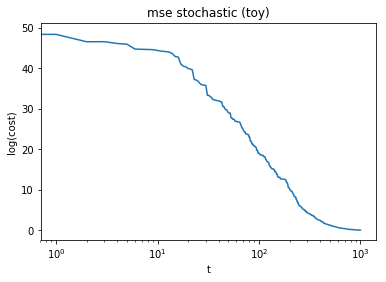

In [27]:
plt.figure()
plt.semilogx(pobj)
plt.xlabel('t')
plt.ylabel('log(cost)')
plt.title('%s stochastic (toy)' % loss)
plt.show()

5. Utiliser la fonction stochastic_gradient fournie. Proposer le choix d'un pas constant γ et d'un
 nombre d'itérations T permettant de minimiser le critère et d'aboutir à une solution correcte.

In [47]:
value = []
for cons in [0.001, 0.003, 0.005, 0.007, 0.010, 0.012] :
    for T in [500, 1000, 2000, 5000] :
        pobj = stochastic_gradient(X_toy, y_toy, cons, T, w_ini,loss=loss, alpha=0, average=False)[2]
        value.append(pobj[-1])

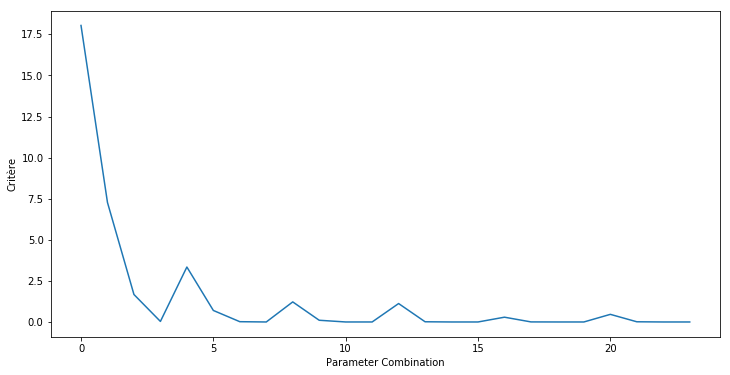

In [71]:
plt.figure(figsize=(12,6))
plt.plot(value)
plt.xlabel("Parameter Combination")
plt.ylabel("Critère")
plt.show()

Pas constant :

In [73]:
val_cons = []
for cons in range(1,20) :
    cons = cons / 1000
    pobj = stochastic_gradient(X_toy, y_toy, cons, n_iter, w_ini, loss=loss, alpha=0, average=False)[2]
    val_cons.append(pobj[-1])

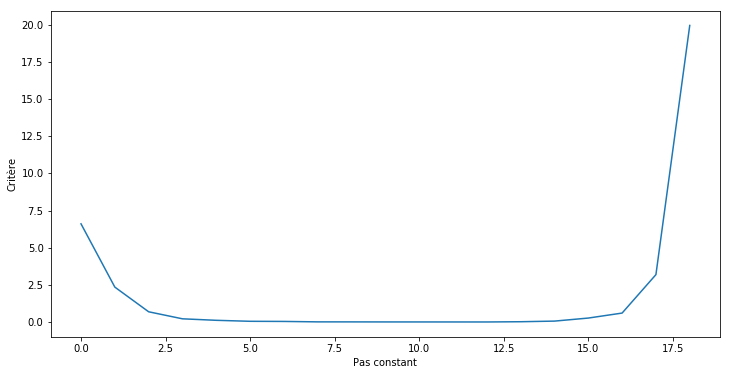

In [76]:
plt.figure(figsize=(12,6))
plt.plot(val_cons)
plt.xlabel("Pas constant")
plt.ylabel("Critère")
plt.show()

In [80]:
val_T = []
for T in range(1,20) :
    T = T * 1000
    pobj = stochastic_gradient(X_toy, y_toy, gamma, T, w_ini,loss=loss, alpha=0, average=False)[2]
    val_T.append(pobj[-1])

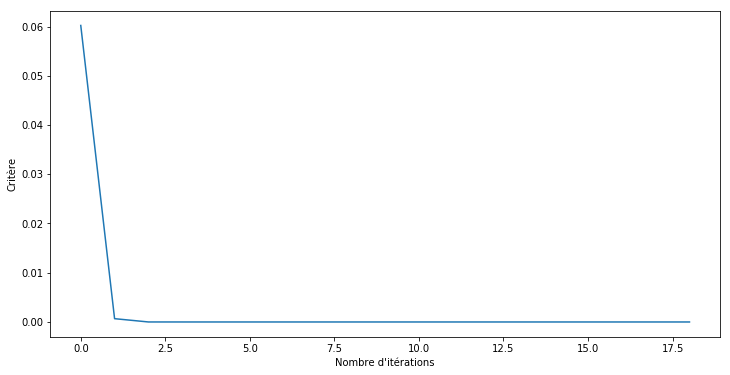

In [81]:
plt.figure(figsize=(12,6))
plt.plot(val_T)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Critère")
plt.show()

Il y a un pas optimal vers 0.005 et un nombre d'itérations supérieur à 2000.

In [138]:
n_iter = 15000  # number of iterations
gamma = 0.0001

6. Régulariser la difficulté en optimisant cette fois la fonction objectif avec un paramètre de régularisation.

In [152]:
############################################################################
#                Stochastic gradient
############################################################################

def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

def norm2(X) :
    """Norme 2 d'un vecteur ou d'une matrice"""
    return np.inner(X,X)

def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse", alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            if alpha > 0:
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w, ord=2)**2
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])) + alpha * w; # QUESTION 2
            else :
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])); # QUESTION 2
        
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        
        w -= gamma_func(t) * gradient
    
        if average is True:
            raise NotImplementedError('QUESTION 9')

        
        
        all_w[t] = w
    return w, all_w, pobj

In [153]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,loss=loss, alpha=0.05, average=False)

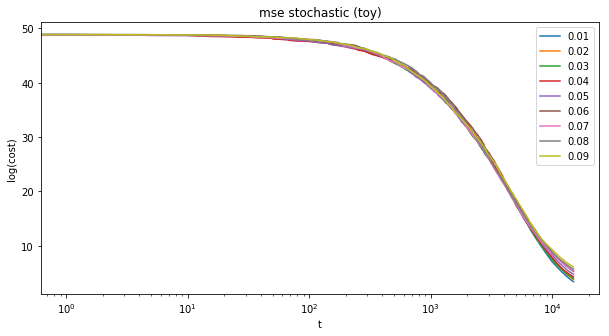

In [156]:
plt.figure(figsize=(10,5))

for a in range(1,10) :
    a = a/100
    w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,loss=loss, alpha=a, average=False)
    plt.semilogx(pobj, label=a)
    
plt.xlabel('t')
plt.ylabel('log(cost)')
plt.title('%s stochastic (toy)' % loss)
plt.legend()
plt.show()

7. Peut-on faire diminuer encore plus la fonction objectif avec un pas non-constant (γt) t=1,...,T qui
décroit au cours des itérations ? Si oui, quel problème cela pose-t-il en pratique ?

In [198]:
############################################################################
#                Stochastic gradient
############################################################################

def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

def norm2(X) :
    """Norme 2 d'un vecteur ou d'une matrice"""
    return np.inner(X,X)

def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse", alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return 1. / (100 + t)
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            if alpha > 0:
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w, ord=2)**2
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])) + alpha * w; # QUESTION 2
            else :
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])); # QUESTION 2
        
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        
        w -= gamma_func(t) * gradient
    
        if average is True:
            raise NotImplementedError('QUESTION 9')
        
        all_w[t] = w
    return w, all_w, pobj

In [199]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,loss=loss, alpha=0.05, average=False)

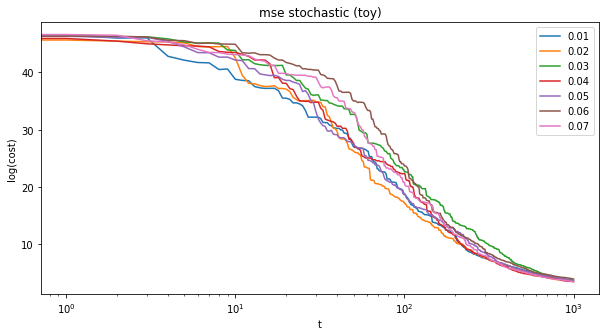

In [200]:
plt.figure(figsize=(10,5))

for g in range(1,8) :
    g = g/100
    w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, g, n_iter, w_ini,loss=loss, alpha=0.05, average=False)
    plt.semilogx(pobj, label=g)
    
plt.xlabel('t')
plt.ylabel('log(cost)')
plt.title('%s stochastic (toy)' % loss)
plt.legend()
plt.show()

On converge plus lentement et on peut se retrouver plus facilement dans des minimas locaux.

# Exemple sur données réelles

8. Utiliser la fonction stochastic_gradient fournie. Proposer le choix d'un pas constant γ et d'un nombre d'itérations T permettant de minimiser le critère et d'aboutir à une solution correcte. On utilisera pour l'instant la perte quadratique : l(a, b) = (a − b)^2/2 et la base de données Iris.

In [201]:
############################################################################
#            Loading and visualizing the data
############################################################################
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

# A function for vizualizing the data and classification given by w
def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()


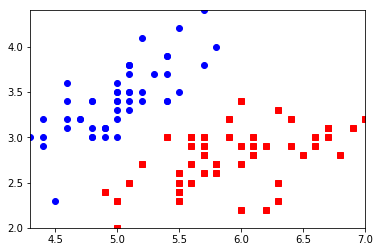

In [202]:
plot_2d(X, y)

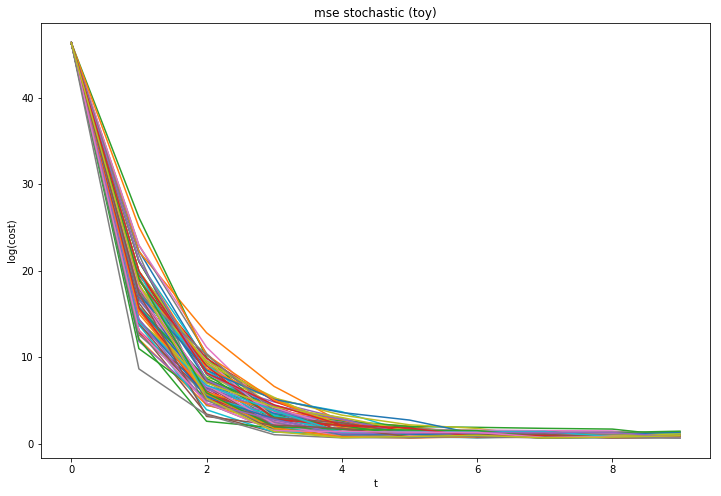

In [212]:
plt.figure(figsize=(12,8))
w_ini = np.ones(X.shape[1] + 1)

for s in range(1,80) :
    s = s/1000
    w_toy, all_w, pobj = stochastic_gradient(X, y, s, 10, w_ini, loss=loss, alpha=0, average=False)
    plt.plot(pobj, label = s)    
    
plt.xlabel('t')
plt.ylabel('log(cost)')
plt.title('%s stochastic (toy)' % loss)
plt.show()

9. Ajouter l'étape de moyennage optionnelle dans votre fonction. Comparer visuellement l'évolution de la fonction objectif (1 􏱵n l(fˆ (x ),y )) en fonction des itérations pour l'algorithme avec et
sans cette étape. La mise à jour peut se faire de manière récursive. On implémentera aussi la même technique, mais en ne moyennant qu'après T+1 T+1
t0 itérations.

In [251]:
############################################################################
#                Stochastic gradient
############################################################################

def gamma(t):
    return 1. / (100 + t)

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.005  # suggested step size
w_ini = np.ones(X.shape[1] + 1)

loss = 'mse'

def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

def norm2(X) :
    """Norme 2 d'un vecteur ou d'une matrice"""
    return np.inner(X,X)

def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse", alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return 1. / (100 + t)
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            if alpha > 0:
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w, ord=2)**2
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])) + alpha * w; # QUESTION 2
            else :
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])); # QUESTION 2
        
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
    
        w -= gamma_func(t) * gradient
        
        if average is True:
            if t <= 1000 :
                w_bar = w
            if t > 1000 :
                w_bar = t/(t+1) * w_bar + 1/(t+1) * w
            
        #pobj_final = 0.5 * np.mean((y - np.dot(X, w_bar)) ** 2) + alpha/2 * np.linalg.norm(w_bar, ord=2)**2
            
        all_w[t] = w
    
    pobj_final = 0.5 * np.mean((y - np.dot(X, w_bar)) ** 2) + alpha/2 * np.linalg.norm(w_bar, ord=2)**2      
    return w, all_w, pobj, pobj_final

In [255]:
w_toy, all_w, pobj, pobj_final = stochastic_gradient(X, y, 0.0005, 10000, w_ini, loss=loss, alpha=0, average=True)


In [256]:
pobj[-1]

0.1079764779342881

In [257]:
pobj_final

0.11727611547952209

10. Régulariser le problème d'otpimisation

In [260]:
w_toy, all_w, pobj, pobj_final = stochastic_gradient(X, y, 0.0005, 1000, w_ini, loss=loss, alpha=0.1, average=True)
print(pobj[-1])
print(pobj_final)

0.2779156554445059
0.2756732332356683


11. Adapter l'algorithme quand on prend comme fonction de perte la fonction Hinge : l(a,b) = max(0, 1 − ab).

In [271]:
############################################################################
#                Stochastic gradient
############################################################################

def gamma(t):
    return 1. / (100 + t)

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.005  # suggested step size
w_ini = np.ones(X.shape[1] + 1)

loss = 'mse'

def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

def norm2(X) :
    """Norme 2 d'un vecteur ou d'une matrice"""
    return np.inner(X,X)

def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse", alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return 1. / (100 + t)
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            if alpha > 0:
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w, ord=2)**2
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])) + alpha * w; # QUESTION 2
            else :
                pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
                gradient = np.dot(X[idx,:], (np.dot(w.T, X[idx,:]) - y[idx])); # QUESTION 2
        
        elif loss == "hinge":
            hinge_loss = np.maximum(0., 1. - y * np.dot(X, w))
            #hinge_loss_avg = np.maximum(0., 1. - y * np.dot(X, w_avg))
            pobj[t] = np.mean(hinge_loss)
            #pobj_avg[t] = np.mean(hinge_loss_avg)
            gradient = X[idx] * (-y[idx] * (hinge_loss[idx] > 0.))
    
        w -= gamma_func(t) * gradient
        
        if average is True:
            if t <= 1000 :
                w_bar = w
            if t > 1000 :
                w_bar = t/(t+1) * w_bar + 1/(t+1) * w
            
        #pobj_final = 0.5 * np.mean((y - np.dot(X, w_bar)) ** 2) + alpha/2 * np.linalg.norm(w_bar, ord=2)**2
            
        all_w[t] = w
    
    #pobj_final = 0.5 * np.mean((y - np.dot(X, w_bar)) ** 2) + alpha/2 * np.linalg.norm(w_bar, ord=2)**2      
    return w, all_w, pobj

In [272]:
w_toy, all_w, pobj = stochastic_gradient(X, y, 0.0005, 10, w_ini, loss='hinge', alpha=0.1, average=False)
print(pobj[-1])

4.820654272805921


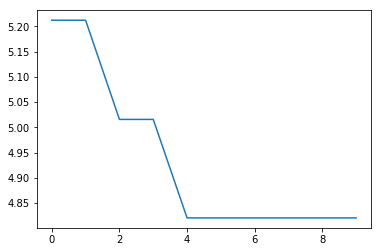

In [273]:
plt.plot(pobj)